# Question 16: Using the Boston data set, fit classification models in order to predict whether a given census tract has a crime rate above or below the median. Explore logistic regression

### Overview:
In Boston Dataset, we will start by analyzing all the features after this we will check for missing values. We will then look in to Correlation between variables and perform Exploratory Data Analysis. We will construct a new column based on the Median value, if value is greater than or equal to median then 0 and if value is less than median then 1. We will build a Logistic Regression Model and try to predict the values of a new column.

### Logistic Regression:
* Logistic Regression is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. In logistic regression, a logit transformation is applied on the odds—that is, the probability of success divided by the probability of failure. This is also commonly known as the log odds, or the natural logarithm of odds. 
* Logistic Regression is given by :
$$ ln( \frac{pi}{(1-pi)} ) = \beta 0 + \beta 1*X_1 + \beta 2*X_2  … + B_k*K_k $$

[Source](https://www.ibm.com/topics/logistic-regression)

There are 14 attributes in each case of the dataset. They are:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10,000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the Dataset

In [2]:
bostonData = pd.read_csv("Boston.csv")

### Shape of the Data

In [3]:
bostonData.shape

(506, 14)

### Checking for Missing Values

In [4]:
bostonData.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
lstat         0
medv          0
dtype: int64

* There are no missing Values

### Data type of all the features available to us

In [5]:
bostonData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


### First 5 values of Boston Dataset

In [6]:
bostonData.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Creating a new column : `crimAboveMedian` and passing Binary Values (0 and 1) based on the `CRIM` variable

In [7]:
 bostonData['crim'].median()

0.25651

### If the value of `CRIM` feature is greater than the median then the value will be 1 and if the `CRIM` feature is less than median then the value wil be 0

In [8]:
bostonData['crimMedian'] = bostonData.apply(lambda x: 1 if x['crim'] >= 0.25651 else 0, axis = 1)

In [9]:
bostonData

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crimMedian
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,0
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,0
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4,0
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6,0
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9,0
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0,0


### Dropping `Unnamed: 0` column because it makes no sense

In [10]:
bostonData = bostonData.drop(['Unnamed: 0'],axis=1)

### Descriptive Statistics of Auto Dataset
* We can observe the count, mean, Standard Deviation, minimum value, maximum value, Quantile Values.

In [11]:
bostonData.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crimMedian
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.500000
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.500495
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.500000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,1.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


### Correlation in Dataset

In [12]:
bostonData.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crimMedian
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536,0.608741


### crimMedian is Closely associated with:
* `crimMedian` shows Strong Positive Correlation with `NOX`.
* `crimMedian` shows Medium Positive Correlation with `INDUS`,`AGE`,`RAD` and `TAX`.
* `crimMedian` shows Low Positive Correlation with `CRIM`,`LSTAT`.
* `crimMedian` shows Low Negative Correlation with `ZN`.
* `crimMedian` shows Medium Negative Correlation with `DIS`.
* with other variables it shows negligible Correlation

In [13]:
bostonData.groupby('crimMedian').size()

crimMedian
0    253
1    253
dtype: int64

Countplot to observe data based on `crimMedian` variable:
* We can observe that crimMedian has 253 values as '0' and same number of values as '1'.

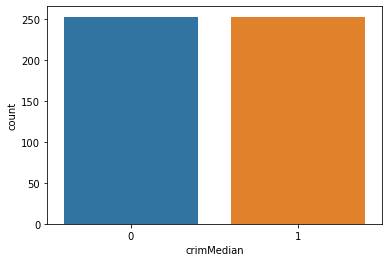

In [14]:
sns.countplot(x='crimMedian',data = bostonData,label='count')
plt.show();

### Heatmap to observe Correlation between features

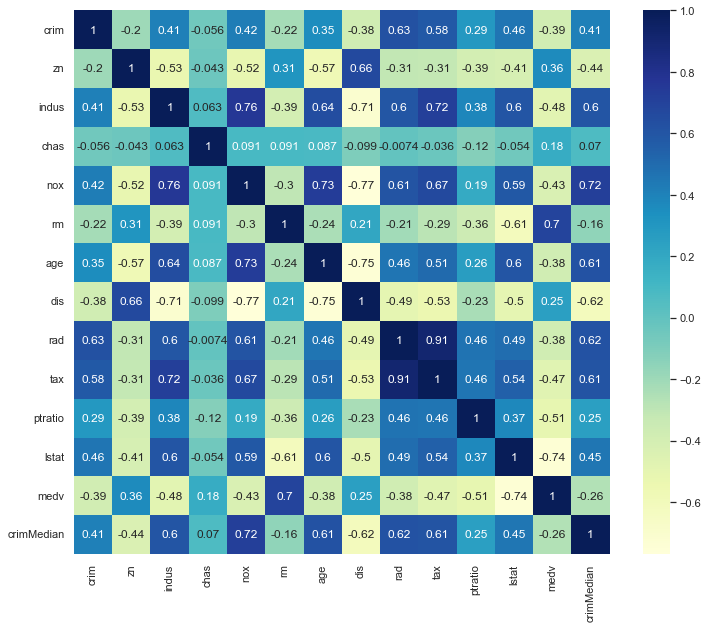

In [15]:
sns.set(rc={'figure.figsize': (12,10)})
sns.heatmap(bostonData.corr(), cmap="YlGnBu", annot=True)
plt.show();

### Based on Heatmap we can say the same things:
* `crimMedian` shows Strong Positive Correlation with `NOX`.
* `crimMedian` shows Medium Positive Correlation with `INDUS`,`AGE`,`RAD` and `TAX`.
* `crimMedian` shows Low Positive Correlation with `CRIM`,`LSTAT`.
* `crimMedian` shows Low Negative Correlation with `ZN`.
* `crimMedian` shows Medium Negative Correlation with `DIS`.
* with other variables it shows negligible Correlation

### Pair Plot to observe variables with crimMedian values where Blue : 0 and Orange : 1

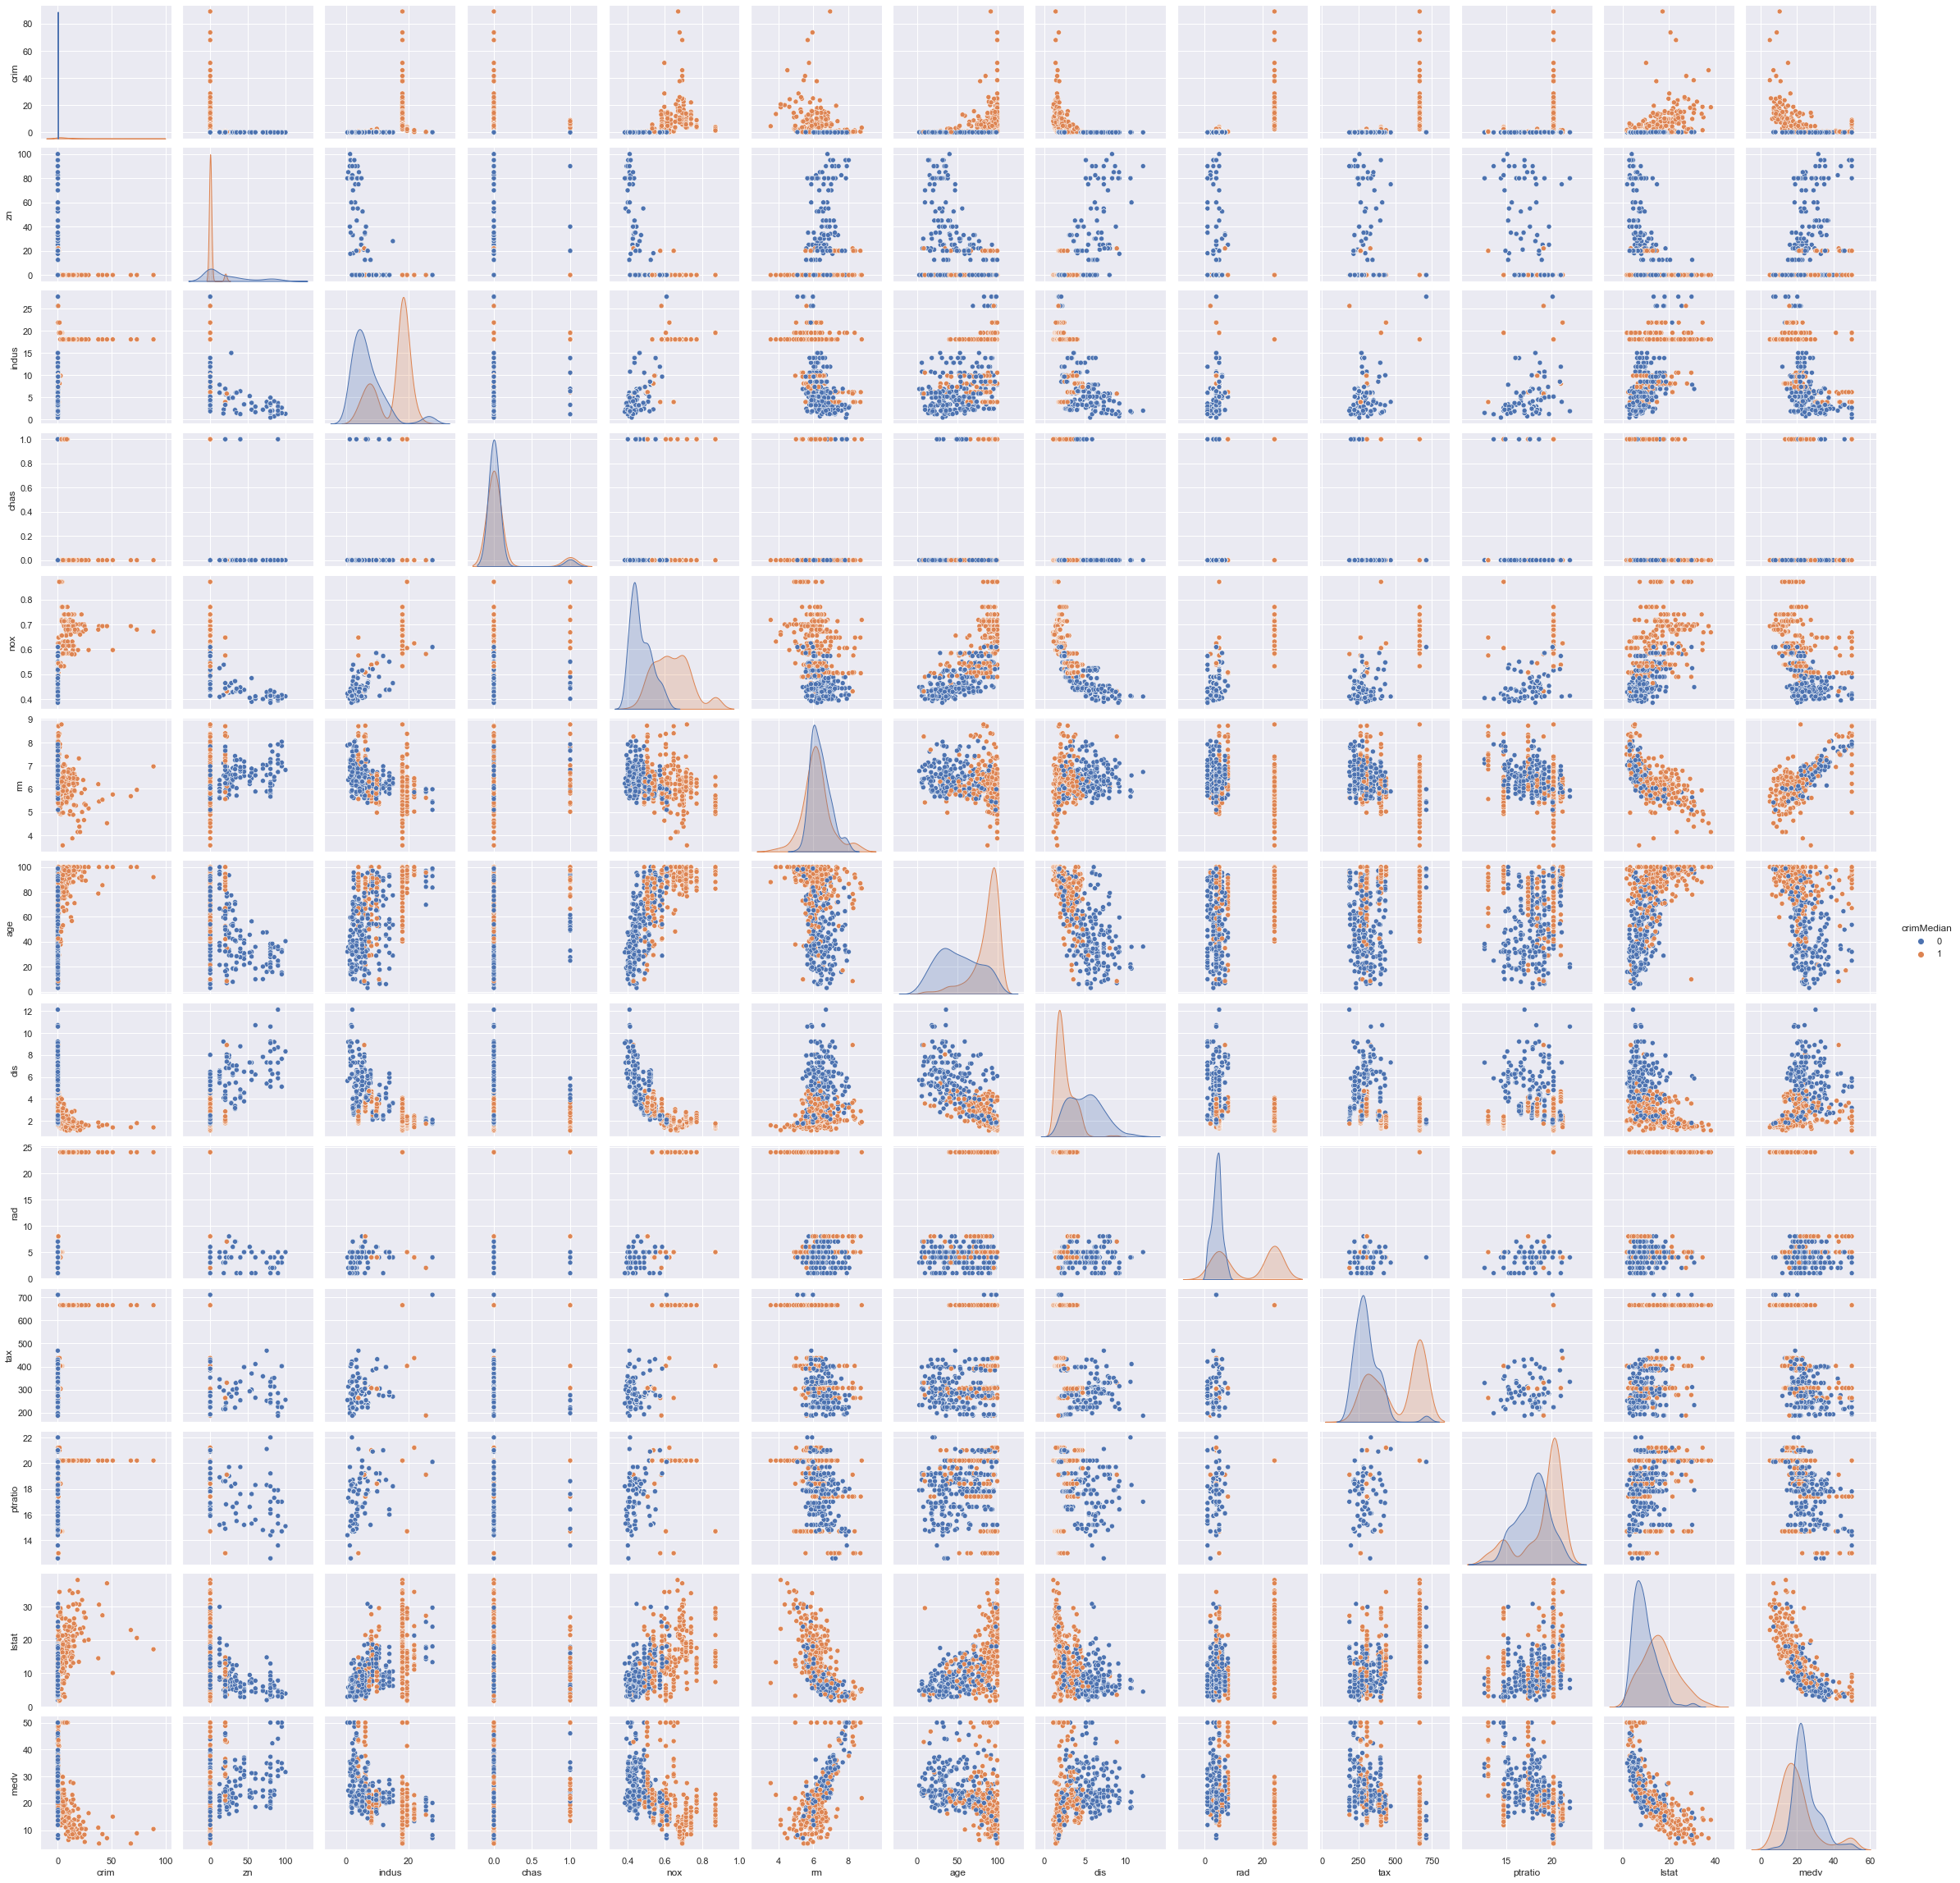

In [16]:
sns.set(rc={'figure.figsize': (20,20)})
sns.pairplot(bostonData, hue='crimMedian')
plt.show()

Here Blue color represents crimMedian value less than median and Orange Color represents crimMedian value higher than Median.

### Logistic Regression Model

In [17]:
bostonData.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv', 'crimMedian'],
      dtype='object')

In [18]:
X = bostonData[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv',]]
y = bostonData['crimMedian']

### Apply Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Build Models
* Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X,y)

LogisticRegression()

### Model Intercept and Model Coefficients

In [22]:
model.intercept_

array([-4.40355164])

In [23]:
model.coef_

array([[ 0.61438534, -1.63096258,  0.241133  ,  0.29188352,  3.97656037,
         0.66323372,  1.70422764, -0.89377392,  3.34697581,  0.29967451,
         0.3348029 ,  0.42637663,  1.05365193]])

### Evaluate the Model
* predict_proba() : returns the matrix of probabilities that the predicted output is equal to zero or one.

In [24]:
y_pred_proba = model.predict_proba(X)

In [25]:
y_pred_proba

array([[0.82511845, 0.17488155],
       [0.80755061, 0.19244939],
       [0.80264157, 0.19735843],
       ...,
       [0.50768339, 0.49231661],
       [0.53393862, 0.46606138],
       [0.64842404, 0.35157596]])

### Predicting y based on Model

In [26]:
y_pred = model.predict(X)

In [27]:
print("Accuracy of Logistic Regression Model : {:.2f} %".format(model.score(X,y) * 100))

Accuracy of Logistic Regression Model : 85.18 %


### We can observe an accuracy of 85.18 % which is good compared to figured we are dealing and the values we have.

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

### Classification Report

In [29]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       253
           1       0.89      0.81      0.84       253

    accuracy                           0.85       506
   macro avg       0.85      0.85      0.85       506
weighted avg       0.85      0.85      0.85       506



### Here Precision tells us the percentage of correct positive predictions relative to total positive predictions. Here weight avg value of precision is 85%.
### Recall tells us the Percentage of correct positive predictions relative to total actual positives. Here, weight avg value of recall is 85%.
### F1 score is weighted harmonic mean of precision and recall. The closer to 1 the better the model. F1 score of our model is 0.85.

### Confusion Matrix for our Model:
### Confusion Matrix tells more about the accuracy of the model, In case of binary Classification, the confusion matrix shows the numbers of the following:
* True negatives in the upper-left position.
* False negatives in the lower-left position.
* False positives in the upper-right position.
* True positives in the lower-right position.

In [30]:
confusionMatrix = confusion_matrix(y,y_pred)

In [31]:
print(confusionMatrix)

[[227  26]
 [ 49 204]]


### True Negative value of 227: which means around 227 times real value said the CRIME Rate is Low and value predicted by model also said CRIME Rate is Low.
### True Positive value of 204 : which means around 204 times real value said CRIME Rate is High and value predicted by model also said CRIME Rate is High.
### False positive value of 26 : this is also called type 1 error. This is when model predicted the CRIME Rate is High but in real the CRIME Rate was Low.
### False negative value of 49 ; this is also called type 2 error. This is when model predicted CRIME Rate is Low but in real CRIME Rate was High.

### Heatmap of Confusion Matrix

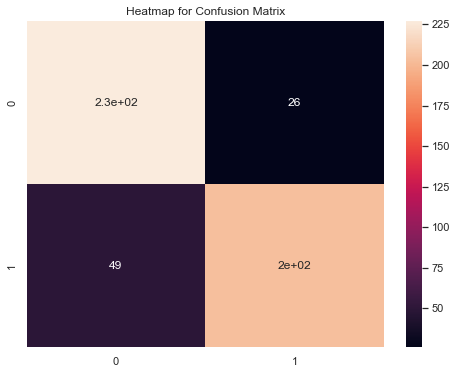

In [32]:
sns.set(rc={'figure.figsize': (8,6)})
sns.heatmap(confusionMatrix, annot=True)
plt.title("Heatmap for Confusion Matrix")
plt.show();

### Heatmap for Percentage of Data Present in Each Quadrant

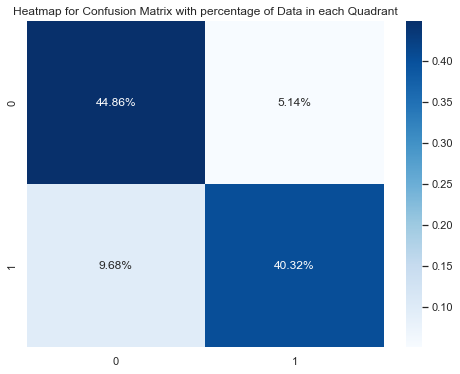

In [33]:
sns.heatmap(confusionMatrix/np.sum(confusionMatrix), annot=True, fmt='.2%', cmap='Blues')
plt.title("Heatmap for Confusion Matrix with percentage of Data in each Quadrant")
plt.savefig("Heatmap_for_confusion_matrix_with_percentage_Data")
plt.show();